In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_rows', 100)

In [3]:
df = pd.read_csv('/content/dataFrameWithDescriptionsAndCorrelation.csv')

In [4]:
from sentence_transformers import SentenceTransformer

# Load a pre-trained embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Compute embeddings for both descriptions
df['Embedding1'] = df['Description1'].apply(lambda x: model.encode(x))
df['Embedding2'] = df['Description2'].apply(lambda x: model.encode(x))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate similarity
df['SemanticSimilarity'] = df.apply(
    lambda row: cosine_similarity([row['Embedding1']], [row['Embedding2']])[0][0],
    axis=1
)


In [6]:
# Define thresholds for analysis
high_correlation_threshold = 0.7  # Adjust as needed
low_similarity_threshold = 0.4   # Adjust as needed

# Identify pairs with high correlation and low similarity
non_obvious_pairs = df[
    (df['Correlation'] > high_correlation_threshold) &
    (df['SemanticSimilarity'] < low_similarity_threshold)
]




In [7]:
non_obvious_pairs

,Description1,Description2,Correlation,Embedding1,Embedding2,SemanticSimilarity
66,PAINTED METAL PEARS ASSORTED,ASSORTED COLOUR BIRD ORNAMENT,0.745205,"[0.05543814, 0.03754716, 0.0140506, -0.0128399...","[0.051171016, 0.04477962, -0.006047635, -0.042...",0.363243


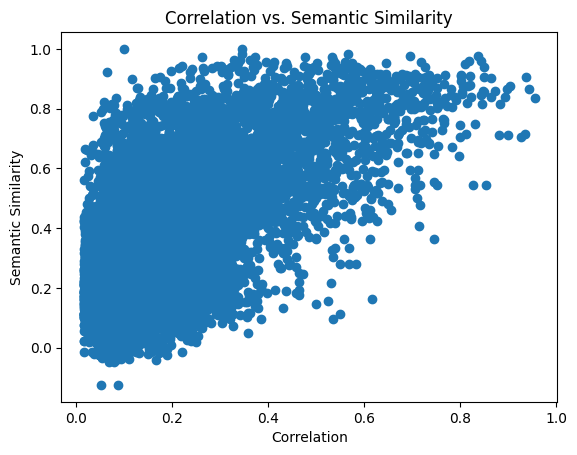

In [8]:
import matplotlib.pyplot as plt

plt.scatter(df['Correlation'], df['SemanticSimilarity'])
plt.xlabel('Correlation')
plt.ylabel('Semantic Similarity')
plt.title('Correlation vs. Semantic Similarity')
plt.show()
